# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [17]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
 
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



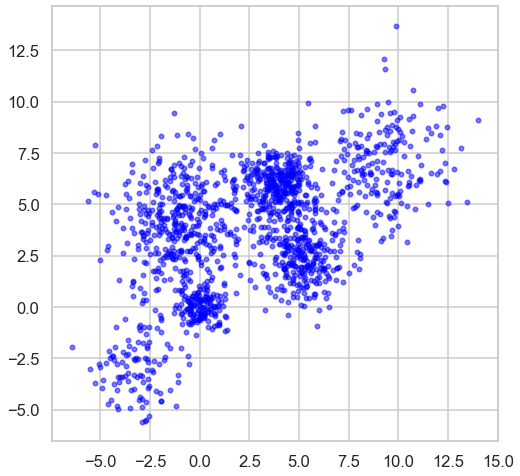

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [18]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
data=pd.DataFrame(data=np.c_[iris_data['data'],iris_data['target']], columns=iris_data['feature_names']+['target'])


In [25]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [19]:
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

In [21]:
# the data is unbalanced (eg sepallength ~4x petalwidth), so should do feature scaling,
# otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
39,-0.900681,0.788808,-1.283389,-1.315444
20,-0.537178,0.788808,-1.169714,-1.315444
80,-0.416010,-1.513160,0.023872,-0.130755
12,-1.264185,-0.131979,-1.340227,-1.447076
44,-0.900681,1.709595,-1.056039,-1.052180


In [22]:
# try clustering on the 4d data and see if can reproduce the actual clusters.

# ie imagine we don't have the species labels on this data and wanted to
# divide the flowers into species. could set an arbitrary number of clusters
# and try dividing them up into similar clusters.

# we happen to know there are 3 species, so let's find 3 species and see
# if the predictions for each point matches the label in y.

from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

> **Silhouette score** - a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.


In [23]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.45994823920518635

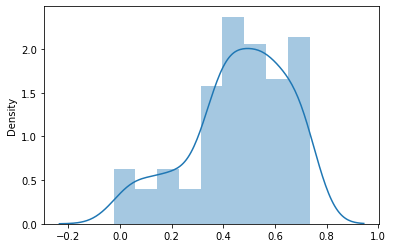

In [24]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

In [ ]:
data=pd.DataFrame(data=np.c_[iris_data['data'],iris_data['target']], columns=iris_data['feature_names']+['target'])


## Plot distortion function versus K and choose the approriate value of k

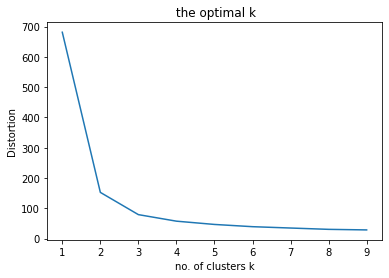

In [ ]:
sse=[]
k_range=range(1,10)
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(iris_data['data'])
    sse.append(kmeans.inertia_)

plt.plot(k_range,sse)

plt.title(" the optimal k")

plt.xlabel("no. of clusters k")

plt.ylabel("Distortion")

plt.show()

## Plot the silhouette_score versus K and use it to choose the best K 

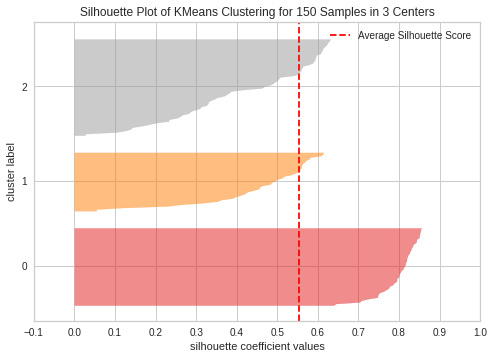

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
X = iris_data.data
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.show()  

## Creating a K-means classifier model

In [ ]:
model=KMeans(n_clusters=3)

model.fit(iris_data['data'])

data.target=model.labels_

df1=data[data.target==0]

df2=data[data.target==1]

df3=data[data.target==2]

model.cluster_centers_ 

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

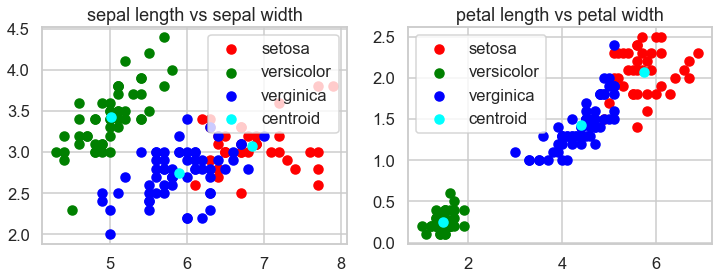

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)



plt.scatter(df1[['sepal length (cm)']],df1[['sepal width (cm)']],color="red",label="setosa")

plt.scatter(df2[['sepal length (cm)']],df2[['sepal width (cm)']],color="green",label="versicolor")

plt.scatter(df3[['sepal length (cm)']],df3[['sepal width (cm)']],color="blue",label="verginica")

plt.scatter(model.cluster_centers_[:,[0]],model.cluster_centers_[:,[1]],color="cyan",label="centroid")

plt.title('sepal length vs sepal width')

plt.legend()



plt.subplot(1,2,2)



plt.scatter(df1[['petal length (cm)']],df1[['petal width (cm)']],color="red",label="setosa")

plt.scatter(df2[['petal length (cm)']],df2[['petal width (cm)']],color="green",label="versicolor")

plt.scatter(df3[['petal length (cm)']],df3[['petal width (cm)']],color="blue",label="verginica")

plt.scatter(model.cluster_centers_[:,[2]],model.cluster_centers_[:,[3]],color="cyan",label="centroid")

plt.title('petal length vs petal width')

plt.legend()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

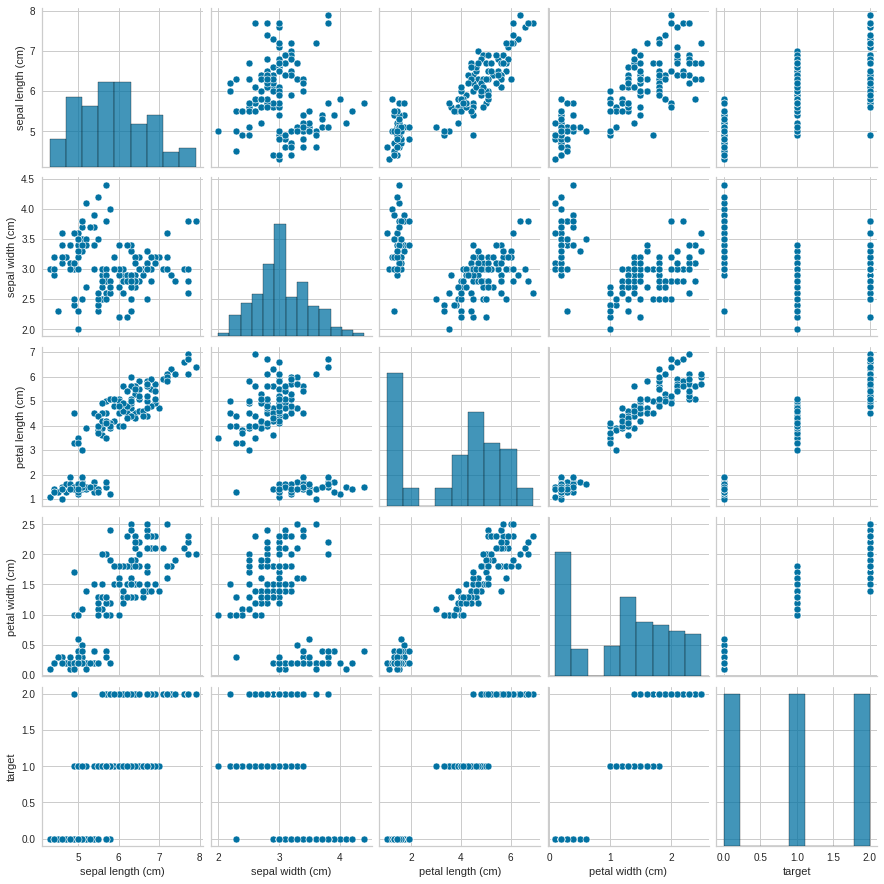

In [ ]:
import seaborn as sns
data=pd.DataFrame(data=np.c_[iris_data['data'],iris_data['target']], columns=iris_data['feature_names']+['target'])

sns.pairplot(data)

In [ ]:

iris_data = data[['sepal length (cm)', 'petal width (cm)']]



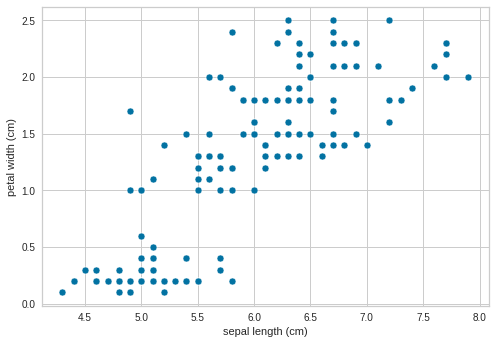

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', data=iris_data)



## using average linkage


In [ ]:
from sklearn.cluster import AgglomerativeClustering

groups = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')

groups .fit_predict(iris_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

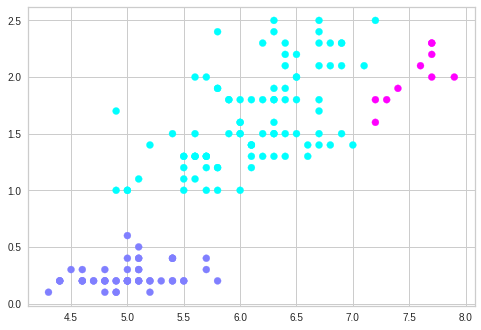

In [ ]:
plt.scatter(iris_data['sepal length (cm)'] ,iris_data['petal width (cm)'], c= groups.labels_, cmap='cool')



## using single linkage

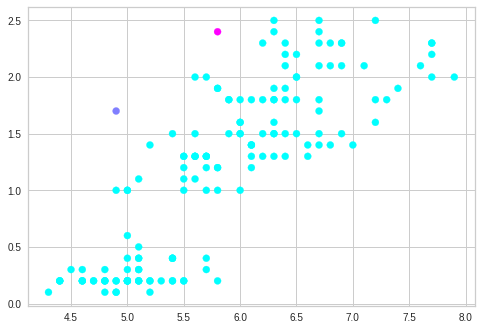

In [ ]:
from sklearn.cluster import AgglomerativeClustering

groups = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')

groups .fit_predict(iris_data)
plt.scatter(iris_data['sepal length (cm)'] ,iris_data['petal width (cm)'], c= groups.labels_, cmap='cool')

In [ ]:
from sklearn.metrics import adjusted_rand_score
avg = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='average')
sing = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
avg_pred = avg.fit_predict(data)
singl_pred = avg.fit_predict(data)
avg_ar_score = adjusted_rand_score(data.target, avg_pred)
single = adjusted_rand_score(data.target, singl_pred)

print('Average: ',avg_ar_score)
print('Single: ',single)

Average:  0.97993200471804
Single:  0.97993200471804


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
X, Y = iris_data.data[:, [2,3]], iris_data.target

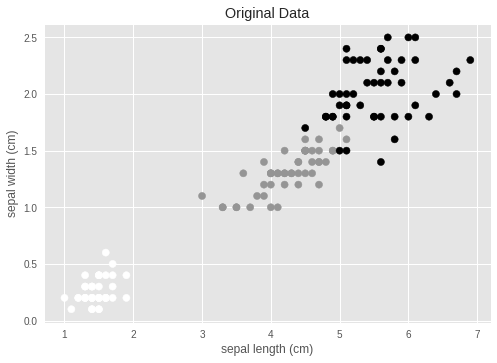

In [ ]:
with plt.style.context("ggplot"):
    plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
    plt.xlabel(iris_data.feature_names[0])
    plt.ylabel(iris_data.feature_names[1])
    plt.title("Original Data");

In [ ]:
def plot_actual_prediction_iris(X, Y, Y_preds):
    with plt.style.context(("ggplot", "seaborn")):
        plt.figure(figsize=(17,6))

        plt.subplot(1,2,1)
        plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y==1,0],X[Y==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y==2,0],X[Y==2,1], c = 'blue', marker="^", s=50)
        plt.xlabel(iris_data.feature_names[0])
        plt.ylabel(iris_data.feature_names[1])
        plt.title("Original Data")

        plt.subplot(1,2,2)
        plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'blue', marker="^", s=50)
        plt.xlabel(iris_data.feature_names[0])
        plt.ylabel(iris_data.feature_names[1])
        plt.title("Clustering Algorithm Prediction");

## Fitting DBSCAN on IRIS Data with Default Parameters 


In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN()

Y_preds = db.fit_predict(X)

Y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Visualizing Clustering Results¶


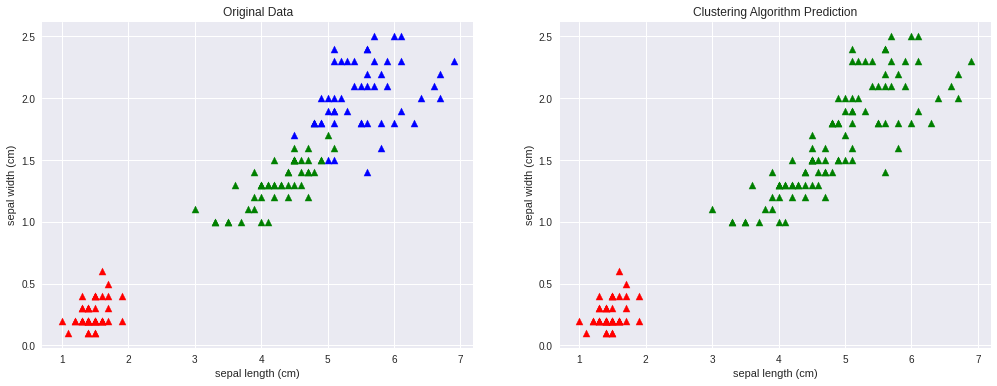

In [ ]:
plot_actual_prediction_iris(X, Y, Y_preds)

## Evaluating Performance of DBSCAN¶


In [ ]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(Y, Y_preds)

dbscnval=adjusted_rand_score(Y, Y_preds)

0.5681159420289855

In [ ]:
db = DBSCAN(eps=0.1, min_samples=5, )

Y_preds = db.fit_predict(X)

Y_preds

array([ 0,  0,  0,  1,  0, -1,  0,  1,  0,  1,  1,  2,  0, -1, -1, -1, -1,
        0,  2,  1,  2, -1, -1, -1, -1,  2, -1,  1,  0,  2,  2, -1,  1,  0,
        1, -1,  0,  0,  0,  1,  0,  0,  0, -1, -1,  0,  2,  0,  1,  0, -1,
        3, -1,  4,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1,
        3, -1, -1,  4, -1, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,  3,
       -1, -1, -1,  4,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

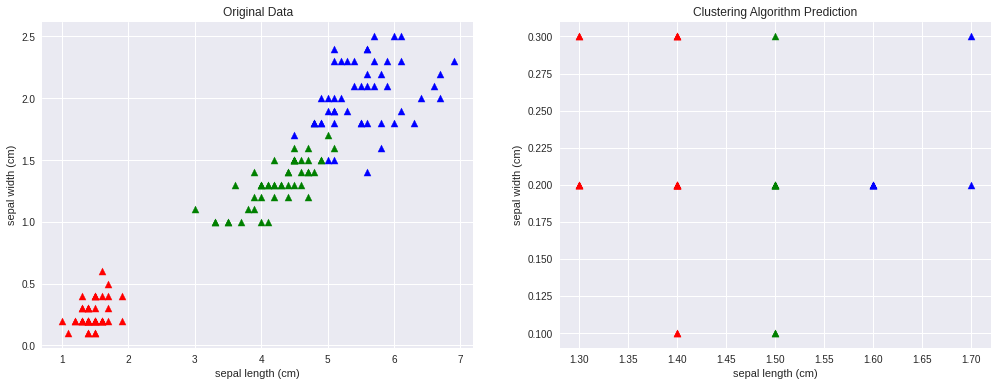

In [ ]:
plot_actual_prediction_iris(X, Y, Y_preds)

## Evaluating Performance of DBSCAN¶


In [ ]:
adjusted_rand_score(Y, Y_preds)


0.18169007287293085

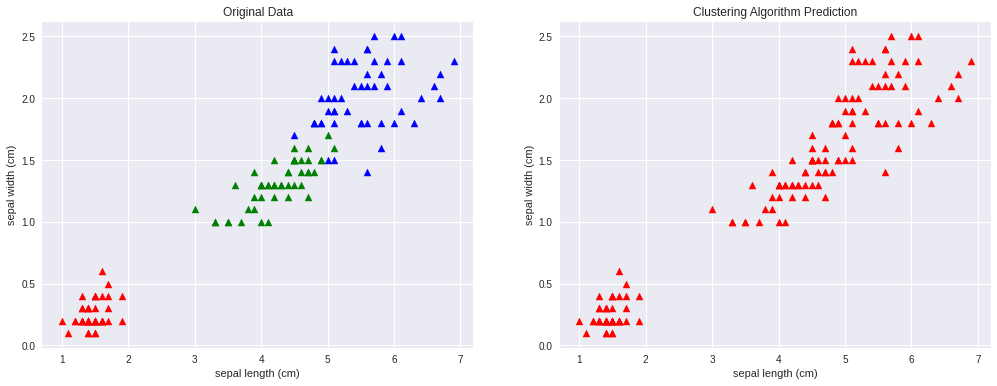

In [ ]:
db = DBSCAN(eps=3,
            min_samples=25,
            metric='euclidean')
Y_preds = db.fit_predict(X)

plot_actual_prediction_iris(X, Y, Y_preds)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [4]:
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
data=pd.DataFrame(data=np.c_[iris_data['data'],iris_data['target']], columns=iris_data['feature_names']+['target'])


In [26]:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
from sklearn.metrics.cluster import adjusted_rand_score

# first let's see how the k-means clustering did - 
score = adjusted_rand_score(y, y_cluster_kmeans)
score

0.6201351808870379

# so the GMM clustering matched the true labels more closely than the Kmeans,as expected from the plots.

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [ ]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  